# Simple K_means clustering
Implementing from scratch

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

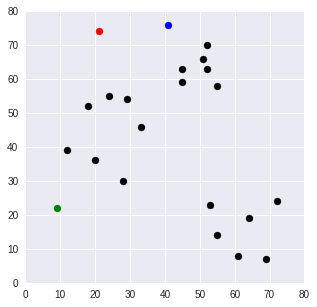

In [36]:
df = pd.DataFrame({
    'x': [12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
    'y': [39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
})
np.random.seed(300)

k=3
centroids = {
    i+1: [np.random.randint(0,80),np.random.randint(0,80)]
    for i in range(k)
}

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1:'r', 2:'g', 3:'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        36.138622        17.262677        47.010637        2     g
1  20  36        38.013156        17.804494        45.177428        2     g
2  28  30        44.553339        20.615528        47.801674        2     g
3  18  52        22.203603        31.320920        33.241540        1     r
4  29  54        21.540659        37.735925        25.059928        1     r


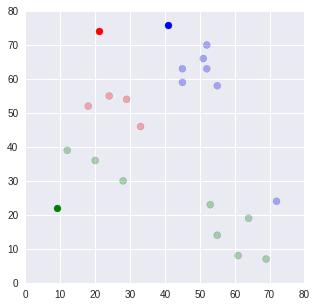

In [38]:
def assignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2 +
                (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

Now we will update the centroids

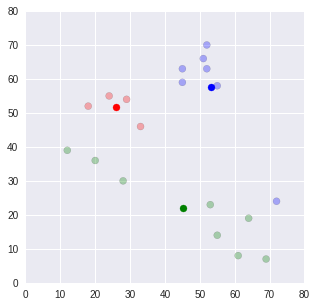

In [34]:
import copy
old_centroids = copy.deepcopy(centroids)

def update(k):
  for i in centroids.keys():
    centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
    centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
  return k
    
centroids = update(centroids)


fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

for i in old_centroids.keys():
  old_x = old_centroids[i][0]
  old_y = old_centroids[i][1]
  dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
  dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
  ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i],
           ec=colmap[i])
plt.show()

Repeat assignment stage

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        36.138622        17.262677        47.010637        2     g
1  20  36        38.013156        17.804494        45.177428        2     g
2  28  30        44.553339        20.615528        47.801674        2     g
3  18  52        22.203603        31.320920        33.241540        1     r
4  29  54        21.540659        37.735925        25.059928        1     r


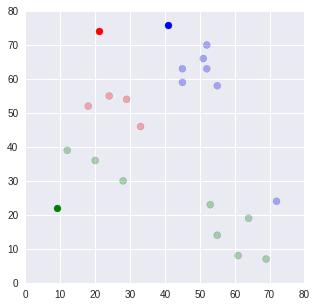

In [39]:
df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

Repeat the process till current and previous centroids are the same

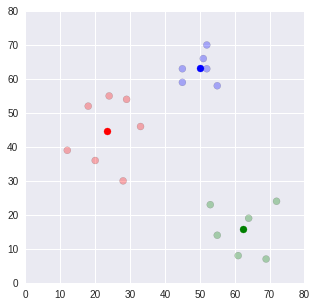

In [40]:
while True:
  closest_centroids = df['closest'].copy(deep=True)
  centroids = update(centroids)
  df = assignment(df, centroids)
  if closest_centroids.equals(df['closest']):
    break
  
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.3, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

#Now implementing the same with sklearn
Let's start with same data

In [42]:
df = pd.DataFrame({
    'x': [12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
    'y': [39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
})

from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3)
kmean.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [0]:
labels = kmean.predict(df)
centroids = kmean.cluster_centers_

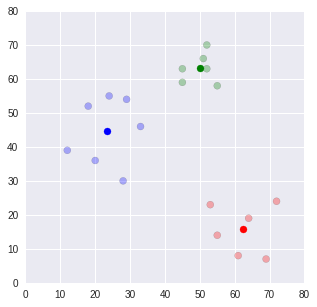

In [45]:
#plotting
fig = plt.figure(figsize=(5, 5))
colors = map(lambda x: colmap[x+1], labels)
colo = list(colors)
plt.scatter(df['x'], df['y'], color=colo, alpha=0.3, edgecolor='k')
for idx, centroid in enumerate(centroids):
  plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

The last graph centroids are the same only color coding is different.